# Entrenamiento conjuntos globales

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

Se optó por construir los folds previamente utilizando Weka utilzando un filtro que nos garantiza que estos fueron construidos con un proceso de muestreo samplificado

In [2]:
# Abrimos los .csv del fold

training_set = pd.read_csv("./diabetes_balanced_train.csv")
test_set = pd.read_csv("./diabetes_balanced_test.csv")

In [3]:
# Variables en común usadas en todos los entrenamientos

# Número de instancias por pliegue. Todos los folds tienen un número igual
# de instancias positivas y negativas.
attributes = training_set.columns[:-1]
class_attribute = training_set.columns[-1]
class_attribute_name = training_set[training_set.columns[-1]].drop_duplicates()

positive_count, negative_count = training_set.groupby([class_attribute])[class_attribute].count()


print(len(attributes))
print(class_attribute)
print(len(class_attribute_name))
print(positive_count)

8
class
2
800


## Entrenamiento con fold 1

### Exploración de número de neuronas

In [4]:
from sklearn.neural_network import MLPClassifier

last_expermient_no = 0 # Número del último experimento conducido
init_neurons = (len(attributes)+len(class_attribute_name)) // 2
hidden_layer_sizes = (init_neurons) # Número de neuronas/capas
epochs = 1
learning_rate = 0
momentum = 0


results = []

for neurons_count in range(init_neurons, (init_neurons*2) + 3, 1):
    print(f"================{neurons_count} neurons===================")
    hidden_layer_sizes = (neurons_count) 
    clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=hidden_layer_sizes,
                    random_state=98041)


    #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
    train_attribute_values = training_set[attributes]
    train_class_values = training_set[class_attribute]

    test_attribute_values = test_set[attributes]
    test_class_values = test_set[class_attribute]

    ################## Modelo ###########################
    model = clasificador.fit(train_attribute_values, train_class_values)
    ################## Clasificar  #################
    predict = model.predict(test_attribute_values)
    ############ Evaluar ###############################
    report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
    report = classification_report(test_class_values, predict, labels=class_attribute_name)
    # record training set accuracy and error
    training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
    training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
    # record generalization accuracy and error
    test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
    test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
    #print(report)
    print(f"acc={report_dict['accuracy']}")
    print(f"training_accuracy = {training_accuracy}")
    print(f"test_accuracy = {test_accuracy}")
    #last_expermient_no += 1
    #results.append([])


# Escribir los resultados a un .csv para llevar record de los expermientos
#experiments_fold_1 = pd.read_csv('experiments_fold_1.csv')
#for result in results:
#    experiments_fold_1.loc[len(experiments_fold_1)] = result
#experiments_fold_1.to_csv('experiments_fold_1.csv', index=False)


================5 neurons===================
acc=0.765
training_accuracy = 0.746875
test_accuracy = 0.765
================6 neurons===================
acc=0.665
training_accuracy = 0.690625
test_accuracy = 0.665
================7 neurons===================
acc=0.735
training_accuracy = 0.733125
test_accuracy = 0.735
================8 neurons===================
acc=0.765
training_accuracy = 0.729375
test_accuracy = 0.765
================9 neurons===================
acc=0.73
training_accuracy = 0.730625
test_accuracy = 0.73
================10 neurons===================
acc=0.745
training_accuracy = 0.750625
test_accuracy = 0.745
================11 neurons===================
acc=0.7575
training_accuracy = 0.736875
test_accuracy = 0.7575
================12 neurons===================
acc=0.77
training_accuracy = 0.759375
test_accuracy = 0.77


Al hacer esta prueba, a diferencia del entrenamiento con folds, las ventaje de la topología con 8 y 10 neuronas no era tan evidente, ya que la topologías de 11 y 12 neuronas también presentan un buen accuracy y una disparidad entre los dos accuracies que podría estar en rango. Por lo tanto, probaré topologías con 8, 10, 11 y 12 neuronas para este experimento, porque tal vez tomando los conjuntos globales se vuelven evidentes patrones usando más neuronas. 

### Experimentación número de capas ocultas

In [5]:
last_expermient_no = 0 # Número del último experimento conducido
epochs = 1
learning_rate = 0
momentum = 0

results = []

hidden_layer_sizes = []

for n in (8, 10, 11, 12):
    hidden_layer_sizes = []
    for _ in range(1, 6, 1):
        hidden_layer_sizes.append(n)
        print(f"================layers = {hidden_layer_sizes}===================")
        clasificador = MLPClassifier(solver='lbfgs', 
                        hidden_layer_sizes=hidden_layer_sizes,
                        random_state=98041)


        #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
        train_attribute_values = training_set[attributes]
        train_class_values = training_set[class_attribute]

        test_attribute_values = test_set[attributes]
        test_class_values = test_set[class_attribute]

        ################## Modelo ###########################
        model = clasificador.fit(train_attribute_values, train_class_values)
        ################## Clasificar  #################
        predict = model.predict(test_attribute_values)
        ############ Evaluar ###############################
        report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
        report = classification_report(test_class_values, predict, labels=class_attribute_name)
        # record training set accuracy and error
        training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
        training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
        # record generalization accuracy and error
        test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
        test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
        #print(report)
        print(f"acc={report_dict['accuracy']}")
        print(f"training_accuracy = {training_accuracy}")
        print(f"test_accuracy = {test_accuracy}")


================layers = [8]===================
acc=0.765
training_accuracy = 0.729375
test_accuracy = 0.765
================layers = [8, 8]===================
acc=0.785
training_accuracy = 0.764375
test_accuracy = 0.785
================layers = [8, 8, 8]===================
acc=0.7875
training_accuracy = 0.764375
test_accuracy = 0.7875
================layers = [8, 8, 8, 8]===================
acc=0.76
training_accuracy = 0.78125
test_accuracy = 0.76
================layers = [8, 8, 8, 8, 8]===================
acc=0.7525
training_accuracy = 0.72
test_accuracy = 0.7525
================layers = [10]===================
acc=0.745
training_accuracy = 0.750625
test_accuracy = 0.745
================layers = [10, 10]===================
acc=0.6
training_accuracy = 0.61
test_accuracy = 0.6
================layers = [10, 10, 10]===================
acc=0.7825
training_accuracy = 0.76375
test_accuracy = 0.7825
================layers = [10, 10, 10, 10]===================
acc=0.7775
training_accuracy = 0

Al análizar cada uno de los resultados para las distintas topologías, nuevamente no queda claro cuál es la indicada.

Sin embargo, se pueden descartar las topologías de 5 neuronas , [11,11,11,11], [12,12,12] y [12,12,12,12] por su relativamente bajo accuracy que no justifica su costo computacional.

Por otro lado, las topologías [8], [8,8,8], [8,8,8,8], [10] y [10,10] quedan descartadas por sus bajos accuracies.

El siguiente experimento se realizará con las topologías que no feuron descartadas, las cuales presentan un accuracy igual o superior al 0.77.

### Experimentación número de épocas

################## layers = [8, 8] ########################
---------------------- epochs = 10 -----------------------
New best acc: 0.5325 with 10 epochs
acc=0.52
---------------------- epochs = 20 -----------------------
New best acc: 0.59 with 20 epochs
acc=0.575
---------------------- epochs = 30 -----------------------
New best acc: 0.589375 with 30 epochs
acc=0.59
---------------------- epochs = 40 -----------------------
New best acc: 0.634375 with 40 epochs
acc=0.6475
---------------------- epochs = 50 -----------------------
New best acc: 0.684375 with 50 epochs
acc=0.735
---------------------- epochs = 60 -----------------------
New best acc: 0.713125 with 60 epochs
acc=0.7425
---------------------- epochs = 70 -----------------------
New best acc: 0.725625 with 70 epochs
acc=0.735
---------------------- epochs = 80 -----------------------
New best acc: 0.724375 with 80 epochs
acc=0.75
---------------------- epochs = 90 -----------------------
New best acc: 0.7225 with 90 epo

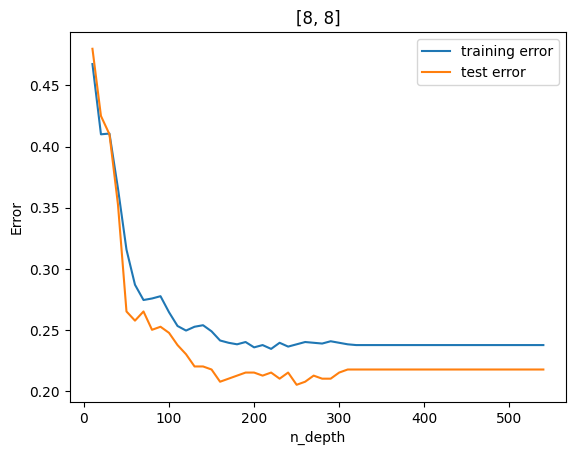

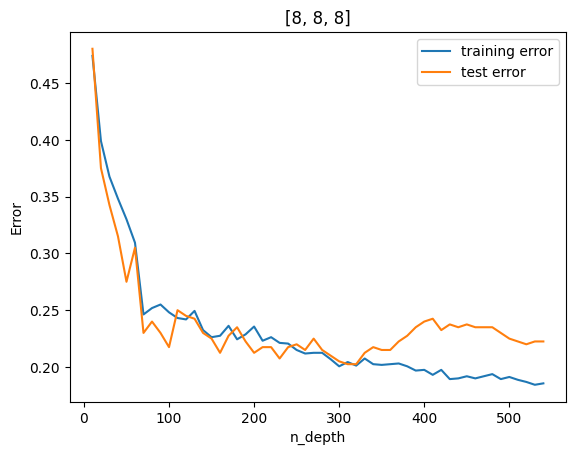

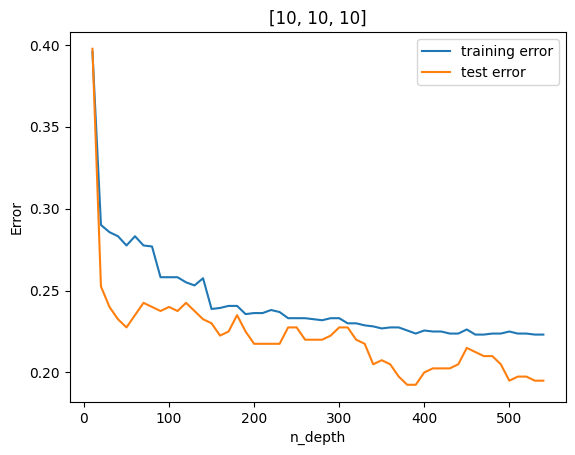

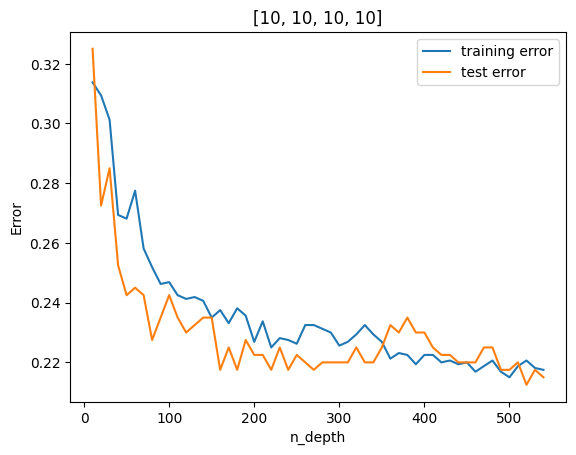

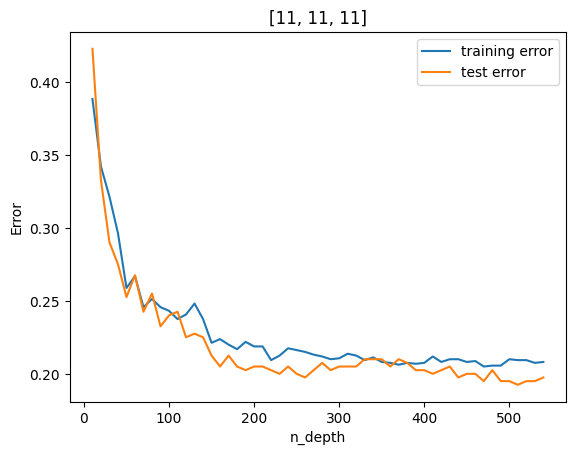

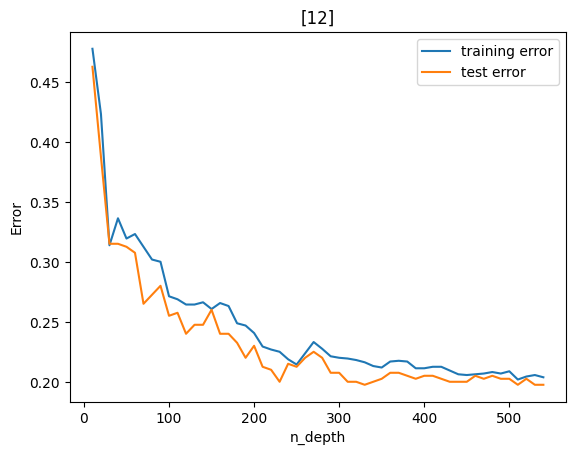

In [7]:
import matplotlib.pyplot as plt

last_expermient_no = 0 # Número del último experimento conducido
learning_rate = 0
momentum = 0

results = []

# Primera ronda [8,8], [8,8,8], [10,10,10], [10, 10, 10, 10], [11], [11,11], [11,11,11], [12], [12,12]
# Segunda ronda [8,8], [8,8,8], [10,10,10], [10, 10, 10, 10], [11,11,11], [12], rango range(10, 550, 10)
topologies = [[8,8], [8,8,8], [10,10,10], [10, 10, 10, 10], [11,11,11], [12]] 
epochs = range(10, 550, 10) # La granulaidad fue cambiando conforme la experimentación

for topology in topologies:
    print(f"################## layers = {topology} ########################")
    
    training_accuracy = []
    test_accuracy = []
    training_error = []
    test_error = []
    
    for epoch in epochs:
        print(f"---------------------- epochs = {epoch} -----------------------")
        best_acc = -1
        clasificador = MLPClassifier(solver='lbfgs', 
                        hidden_layer_sizes=topology,
                        max_iter = epoch,
                        random_state=98041)


        #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
        train_attribute_values = training_set[attributes]
        train_class_values = training_set[class_attribute]

        test_attribute_values = test_set[attributes]
        test_class_values = test_set[class_attribute]

        ################## Modelo ###########################
        model = clasificador.fit(train_attribute_values, train_class_values)
        ################## Clasificar  #################
        predict = model.predict(test_attribute_values)
        ############ Evaluar ###############################
        report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
        report = classification_report(test_class_values, predict, labels=class_attribute_name)

        training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
        training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))

        if training_accuracy[-1] > best_acc:
            print(f"New best acc: {training_accuracy[-1]} with {epoch} epochs")
            best_acc = training_accuracy[-1]

        test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
        test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
        print(f"acc={report_dict['accuracy']}")

    plt.figure()
    plt.title(str(topology))
    plt.plot(epochs, training_error, label="training error")
    plt.plot(epochs, test_error, label="test error")
    plt.ylabel("Error")
    plt.xlabel("n_depth")
    plt.legend()

### Primera ronda

Como podemos ver, en prácticamente todas las gráficas es complicado decir el punto de overfitting ya que todas presentan la característica de que el error sobre el conjunto training es superior al error sobre el conjunto test.

Sin embargo, tras varias corridas, se descartaron las topologías [11,11], [11,11,11] y [12,12] por su alto error relativo a las otras en aproximadamente el mismo número de épocas.

### Segunda ronda

De la segunda ronda, se descarta las topologías [8,8,8], [10,10,10], [10,10,10,10] por tener un accuracy igual o menor a otras más simples.

Se descartaron también la topología [12] por requerir muchas épocas para llegar a un error que otras topologías llegan más rápido.

Esto nos deja con las topologías [8,8] y [11,11,11].

Finalmente opté por la topología [8,8] porque presenta un accuracy muy parecido al mejor (el de [11,11,11]) y requiere la mitad de neuronas que la otra topología y llega a este en aporximadamente 200 menos épocas.

### Experimentos variando learning rate y momentum

NOTA: MLPClassifier ignora los parámetros de learning rate y momentum
cuando se usa el solver lbfgs. Cambié momentariamente a sgd para probar si de esta
forma mejoraba el performance con sgd, pero como se puede observar, no fue el caso.

================LR: 0.1 mom=0.3=======================
New best acc: 0.511875 with 10 epochs
New best acc: 0.5175 with 15 epochs
New best acc: 0.531875 with 20 epochs
New best acc: 0.539375 with 30 epochs
================LR: 0.1 mom=0.6=======================
New best acc: 0.5 with 10 epochs
================LR: 0.1 mom=0.9=======================
New best acc: 0.5 with 10 epochs
================LR: 0.3 mom=0.3=======================
New best acc: 0.5 with 10 epochs
================LR: 0.3 mom=0.6=======================
New best acc: 0.5 with 10 epochs
================LR: 0.3 mom=0.9=======================
New best acc: 0.5 with 10 epochs
================LR: 0.5 mom=0.3=======================
New best acc: 0.5 with 10 epochs
================LR: 0.5 mom=0.6=======================
New best acc: 0.5 with 10 epochs
================LR: 0.5 mom=0.9=======================
New best acc: 0.5 with 10 epochs


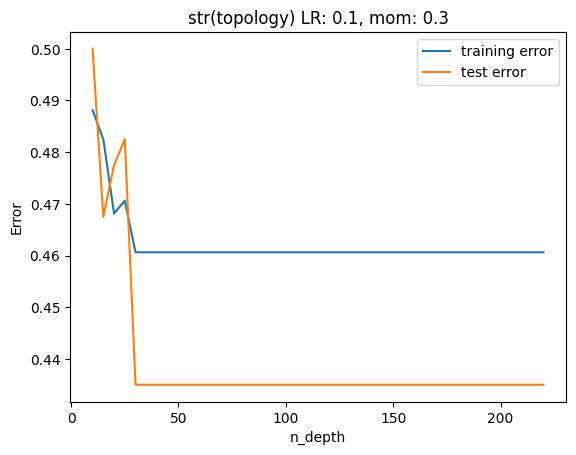

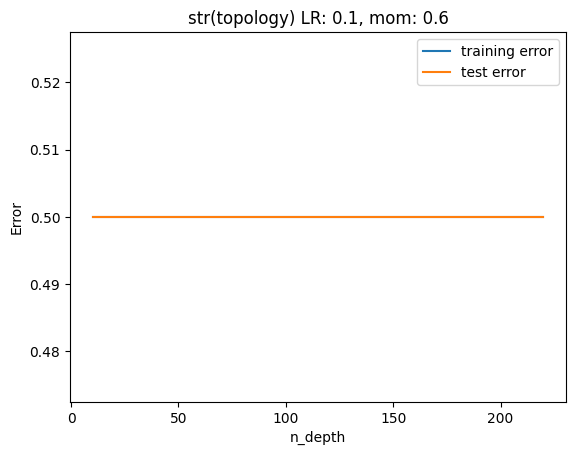

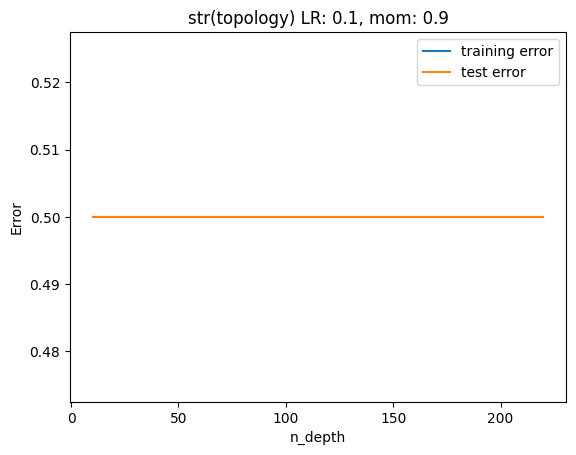

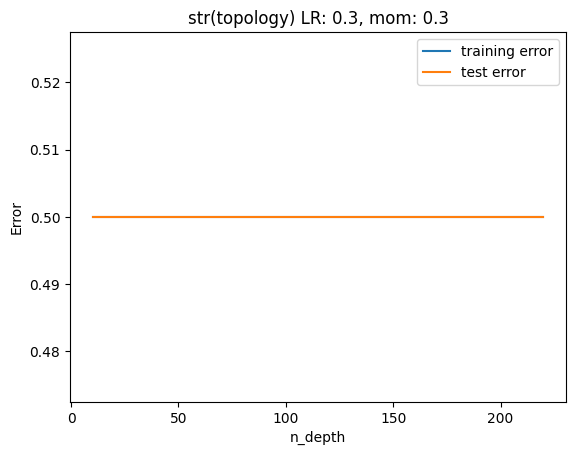

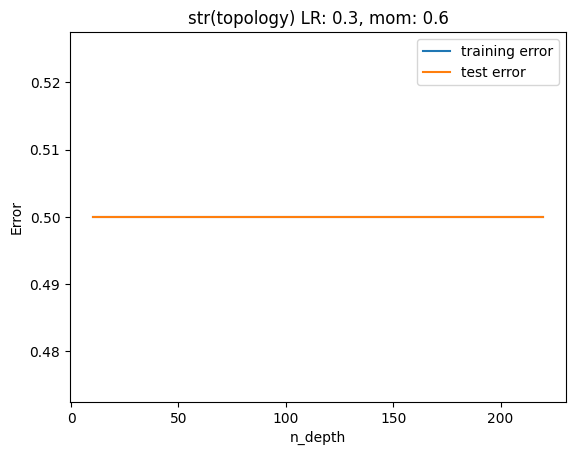

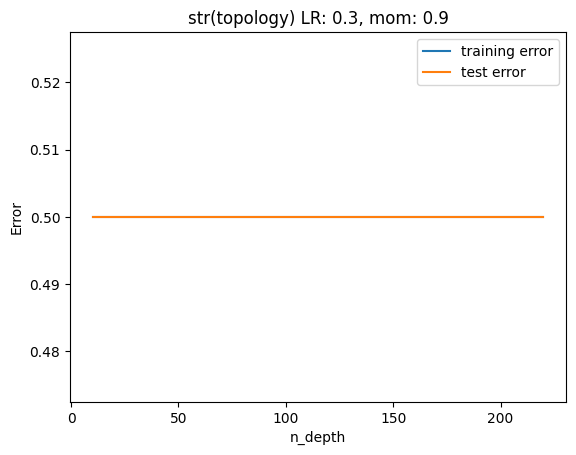

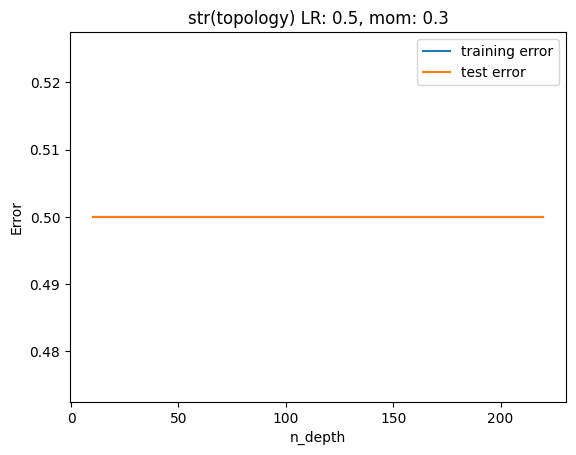

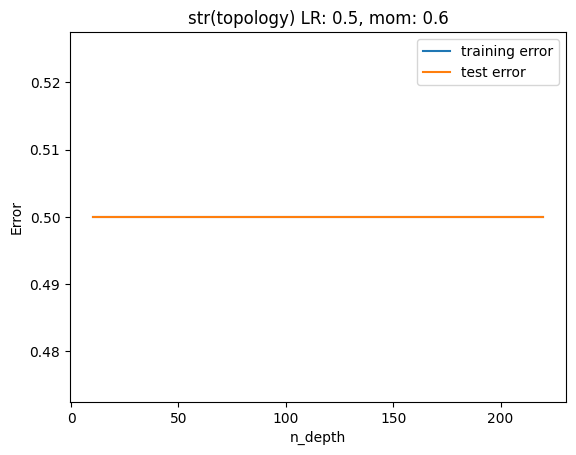

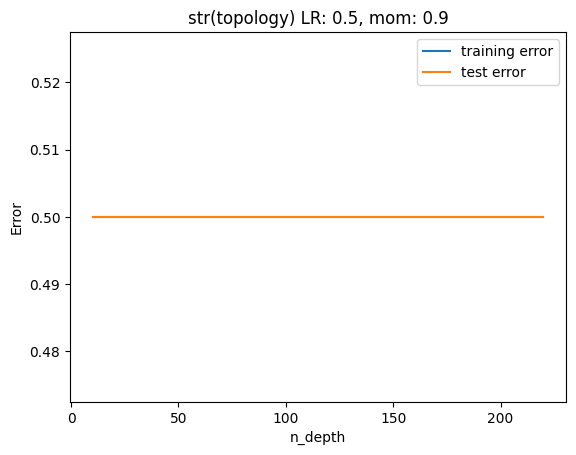

In [8]:
last_expermient_no = 0 # Número del último experimento conducido

# se probaron estas topologías inicialmente: [[8], [8,8,8], [8, 8, 8, 8]]
# Epochs ideal 185
epochs = range(10, 225, 5) # añado un pequeño margen para comprobar que si se entra en overfitting

learning_rate_range = range(1,7,2)
momentum_range = range(3,11,3)

for _lr in learning_rate_range:
    lr = _lr / 10.0
    for _momentum in momentum_range:
        best_acc = -1
        momentum = _momentum / 10.0 if _momentum != 0 else 0
        print(f"================LR: {lr} mom={momentum}=======================")
        training_accuracy = []
        test_accuracy = []
        training_error = []
        test_error = []
        for epoch in epochs:
            clasificador = MLPClassifier(solver='sgd', 
                        hidden_layer_sizes=[8,8,8],
                        max_iter = epoch,
                        random_state=98041,
                        learning_rate_init=lr,
                        momentum=momentum
                        )
            #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
            train_attribute_values = training_set[attributes]
            train_class_values = training_set[class_attribute]
            test_attribute_values = test_set[attributes]
            test_class_values = test_set[class_attribute]
            ################## Modelo ###########################
            model = clasificador.fit(train_attribute_values, train_class_values)
            ################## Clasificar  #################
            predict = model.predict(test_attribute_values)
            ############ Evaluar ###############################
            report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
            report = classification_report(test_class_values, predict, labels=class_attribute_name)
            training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
            if training_accuracy[-1] > best_acc:
                print(f"New best acc: {training_accuracy[-1]} with {epoch} epochs")
                best_acc = training_accuracy[-1]

            training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))
            test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
            test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
            # print(f"acc={report_dict['accuracy']}")
        plt.figure()
        title = f"str(topology) LR: {lr}, mom: {momentum}"
        plt.title(title)
        plt.plot(epochs, training_error, label="training error")
        plt.plot(epochs, test_error, label="test error")
        plt.ylabel("Error")
        plt.xlabel("n_depth")
        plt.legend()

## Parámetros escogidos

Después de experimentar, los parámetros que me dieron mejores resultados fueron:

- solver = 'lbfgs'
- topología = [8, 8]
- épocas = 260
- learning rate = N/A
- momentum = N/A


In [11]:

clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=[8,8],
                    max_iter = 260,
                    random_state=98041,
)
#A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
train_attribute_values = training_set[attributes]
train_class_values = training_set[class_attribute]
test_attribute_values = test_set[attributes]
test_class_values = test_set[class_attribute]
################## Modelo ###########################
model = clasificador.fit(train_attribute_values, train_class_values)
################## Clasificar  #################
predict = model.predict(test_attribute_values)
############ Evaluar ###############################
report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
acc = report_dict["accuracy"]
report = classification_report(test_class_values, predict, labels=class_attribute_name)

print(f"accuracy exacto: {acc}")
print(report)

accuracy exacto: 0.7925
                 precision    recall  f1-score   support

tested_positive       0.80      0.79      0.79       200
tested_negative       0.79      0.80      0.79       200

       accuracy                           0.79       400
      macro avg       0.79      0.79      0.79       400
   weighted avg       0.79      0.79      0.79       400



In [12]:
# Corro la otra topología para confirmar resultados

clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=[11,11,11],
                    max_iter = 440,
                    random_state=98041,
)
#A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
train_attribute_values = training_set[attributes]
train_class_values = training_set[class_attribute]
test_attribute_values = test_set[attributes]
test_class_values = test_set[class_attribute]
################## Modelo ###########################
model = clasificador.fit(train_attribute_values, train_class_values)
################## Clasificar  #################
predict = model.predict(test_attribute_values)
############ Evaluar ###############################
report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
acc = report_dict["accuracy"]
report = classification_report(test_class_values, predict, labels=class_attribute_name)

print(f"accuracy exacto: {acc}")
print(report)

accuracy exacto: 0.8025
                 precision    recall  f1-score   support

tested_positive       0.80      0.81      0.80       200
tested_negative       0.80      0.80      0.80       200

       accuracy                           0.80       400
      macro avg       0.80      0.80      0.80       400
   weighted avg       0.80      0.80      0.80       400

